In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

In [2]:
base_url = 'http://localhost:8000'
endpoint = '/predict'
model = 'yolov3-tiny'

In [4]:
url_with_endpoint = base_url + endpoint
url_with_endpoint

'http://localhost:8000/predict'

In [5]:
full_url = url_with_endpoint + "?model=" + model
full_url

'http://localhost:8000/predict?model=yolov3-tiny'

In [6]:
def response_from_server(url, image_file, verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        image_file (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "All works fine" if status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

In [7]:
with open("images/car3.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

All works fine


In [8]:
directory = "predicted_images"
if not os.path.exists(directory):
    os.mkdir(directory)

In [9]:
def display_image_from_response(response):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """
    
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'predicted_images/{filename}', image)
    display(Image(f'predicted_images/{filename}'))

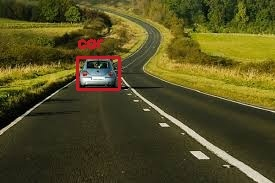

In [10]:
display_image_from_response(prediction)

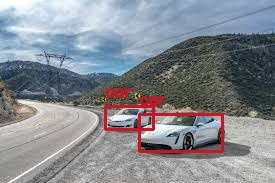

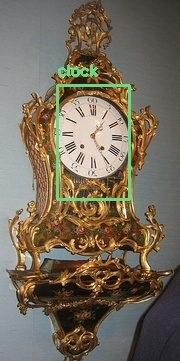

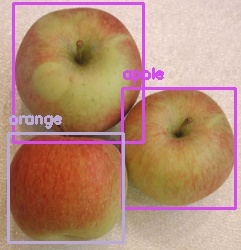

In [11]:
image_files = [
    'car2.jpg',
    'clock3.jpg',
    'apples.jpg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)